# Solar Data from NSRDB
---

**NREL**: National Renewable Energy Laboratory

**NSRDB**: National Solar Radiation Database  
Information can be found at https://nsrdb.nrel.gov  
API: https://developer.nrel.gov/docs/solar/nsrdb/psm3_data_download/

NSRDB is a serially complete collection of meteorological and solar irradiance data sets for the United States and a growing list of international locations. NSRDB uses a physics-based modeling (PSM: Physical Solar Model) approach to provide solar radiation data for the entire United States in gridded segments (4x4 square kilometer) using geostationary satellites. Data can be accessed via an API.

In [1]:
import westernintnet
import sys

sys.path.append("../")

import nsrdb
from matplotlib import pyplot
from helpers import to_reise

## 1. Solar plants in Network

In [2]:
grid = westernintnet.WesternIntNet()
solar_plant = grid.genbus.groupby('type').get_group('solar')

Loading sub
Loading bus2sub
Loading bus
Loading genbus
Loading branches
Loading resources
Loading net_generation
Load solar data
Load wind data
Load hydro data
Load demand data
Done loading


In [3]:
solar_plant.head()

,busID,Pg,Qg,Qmax,Qmin,Vg,mBase,status,Pmax,Pmin,...,mu_Qmax,mu_Qmin,type,lat,lon,GenMWMax,GenMWMin,AreaNum,ZoneName,base_color
plantID,,,,,,,,,,,,,,,,,,,,,
51,10760,0.00,0.0,0.0,0.0,1.0400,69.12,0,61.50,13.06,...,0.0,0.0000;,solar,45.584722,-122.405600,61.500001,13.060357,1,Washington,#feb308
57,10776,0.00,0.0,0.0,0.0,1.0318,32.07,0,28.00,3.77,...,0.0,0.0000;,solar,48.448100,-122.433100,28.000000,3.770000,1,Washington,#feb308
58,10776,14.32,0.0,0.0,0.0,1.0318,23.98,1,14.32,14.32,...,0.0,0.0000;,solar,48.448100,-122.433100,20.000000,6.145376,1,Washington,#feb308
61,10782,13.43,0.0,0.0,0.0,1.0162,27.32,1,13.43,13.43,...,0.0,0.0000;,solar,46.103887,-122.918429,18.333334,6.396563,1,Washington,#feb308
62,10782,14.65,0.0,0.0,0.0,1.0162,18.63,1,14.65,14.65,...,0.0,0.0000;,solar,46.103887,-122.918429,18.333334,7.370976,1,Washington,#feb308


In [4]:
print("There are %d solar plants in the Western grid." % len(solar_plant))

There are 391 solar plants in the Western grid.


## 2. Downloading Data

In [5]:
data = nsrdb.retrieve_data(solar_plant)

100%|████████████████████████████████████████████████████████████████████████████████| 150/150 [09:56<00:00,  3.98s/it]


In [6]:
data.tail(n=20)

,Pout,plantID,ts,tsID
3434524,0.035244,1913,2016-12-31 23:00:00,8784
3434525,0.258974,1986,2016-12-31 23:00:00,8784
3434526,0.153846,1987,2016-12-31 23:00:00,8784
3434527,0.128205,1988,2016-12-31 23:00:00,8784
3434528,0.096154,1989,2016-12-31 23:00:00,8784
3434529,0.238139,2009,2016-12-31 23:00:00,8784
3434530,0.036496,2010,2016-12-31 23:00:00,8784
3434531,0.139599,2011,2016-12-31 23:00:00,8784
3434532,0.456985,2122,2016-12-31 23:00:00,8784
3434533,0.384191,2123,2016-12-31 23:00:00,8784


## 3. Plot Data
One solar plant is selected. The power output (in MW) is then plotted for the entire year for 72-h in June.

In [7]:
data_oneplant = data[data.plantID == 2288]

Text(1,0.75,'Pout')

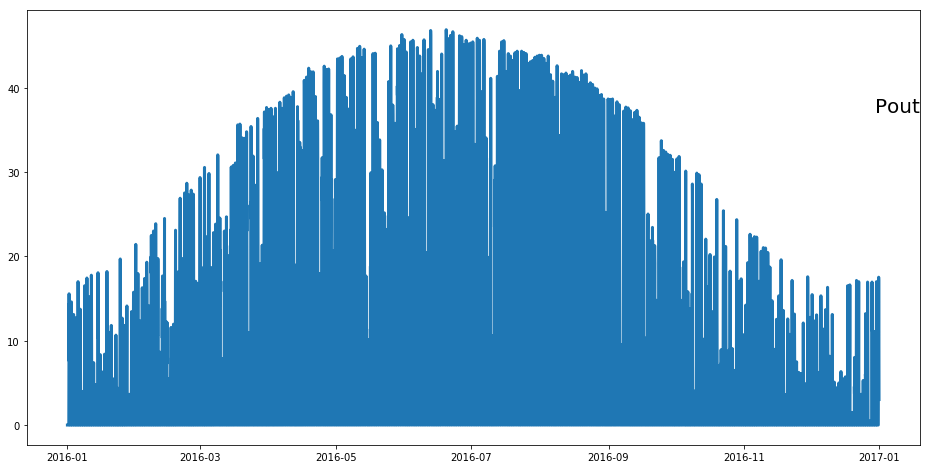

In [8]:
pyplot.figure(figsize=(16,8))
pyplot.plot(data_oneplant['ts'], data_oneplant['Pout'], lw=3)
pyplot.title('Pout', y=0.75, loc='right', fontsize=20)

Text(1,0.75,'Pout')

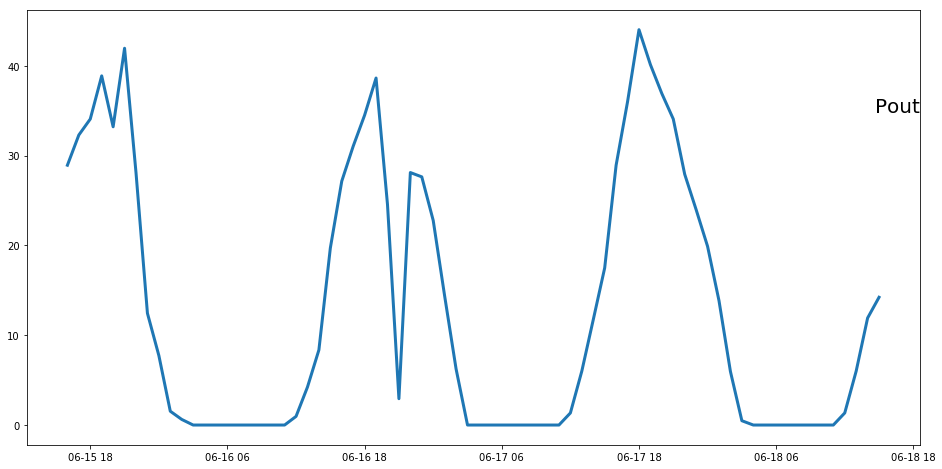

In [9]:
pyplot.figure(figsize=(16,8))
pyplot.plot(data_oneplant[4000:4072]['ts'], data_oneplant[4000:4072]['Pout'], lw=3)
pyplot.title('Pout', y=0.75, loc='right', fontsize=20)

## 4. Format Data
Data are formated for REISE

In [10]:
data_reise = to_reise(data)

In [11]:
data_reise.tail()

,51,57,58,61,62,63,64,65,66,67,...,2124,2125,2126,2285,2286,2287,2288,2363,2364,2484
UTC,,,,,,,,,,,,,,,,,,,,,
2016-12-31 19:00:00,22.450362,8.278775,5.913411,6.463799,6.463799,6.463799,11.477754,16.954450,11.477754,11.477754,...,14.917280,17.403492,4.723805,17.539447,3.739754,3.739754,17.539447,7.988572,7.056571,3.435484
2016-12-31 20:00:00,23.022751,8.544879,6.103485,6.656174,6.656174,6.656174,11.895127,17.570975,11.895127,11.895127,...,13.345589,15.569853,4.226103,17.155021,3.657787,3.657787,17.155021,7.594286,6.708285,3.125806
2016-12-31 21:00:00,20.288004,7.598733,5.427666,5.886674,5.886674,5.886674,10.559534,15.598094,10.559534,10.559534,...,10.229780,11.934742,3.239430,14.223771,3.032787,3.032787,14.223771,6.222857,5.496857,2.467742
2016-12-31 22:00:00,14.564116,5.351637,3.822598,4.251487,4.251487,4.251487,7.387500,10.912500,7.387500,7.387500,...,5.845588,6.819853,1.851103,9.178176,1.956967,1.956967,9.178176,4.028572,3.558571,1.548387
2016-12-31 23:00:00,6.995864,2.247096,1.605069,2.058412,2.058412,2.058412,3.046822,4.500636,3.046822,3.046822,...,1.213235,1.415441,0.384191,3.027357,0.645492,0.645492,3.027357,1.388571,1.226571,0.512903
